In [1]:
#libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 

import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [2]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

(-0.5, 99.5, 99.5, -0.5)

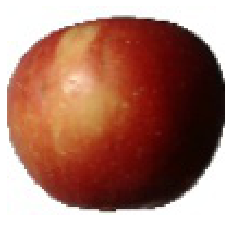

In [3]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")

plt.imshow(img)
plt.axis("off")

In [4]:
x = img_to_array(img)

print(x.shape) #x=100, y=100, RBG=3

(100, 100, 3)


In [5]:
className = glob(train_path + '/*')

className

['fruits-360/Training\\Apple Braeburn',
 'fruits-360/Training\\Apple Crimson Snow',
 'fruits-360/Training\\Apple Golden 1',
 'fruits-360/Training\\Apple Golden 2',
 'fruits-360/Training\\Apple Golden 3',
 'fruits-360/Training\\Apple Granny Smith',
 'fruits-360/Training\\Apple Pink Lady',
 'fruits-360/Training\\Apple Red 1',
 'fruits-360/Training\\Apple Red 2',
 'fruits-360/Training\\Apple Red 3',
 'fruits-360/Training\\Apple Red Delicious',
 'fruits-360/Training\\Apple Red Yellow 1',
 'fruits-360/Training\\Apple Red Yellow 2',
 'fruits-360/Training\\Apricot',
 'fruits-360/Training\\Avocado',
 'fruits-360/Training\\Avocado ripe',
 'fruits-360/Training\\Banana',
 'fruits-360/Training\\Banana Lady Finger',
 'fruits-360/Training\\Banana Red',
 'fruits-360/Training\\Cactus fruit',
 'fruits-360/Training\\Cantaloupe 1',
 'fruits-360/Training\\Cantaloupe 2',
 'fruits-360/Training\\Carambula',
 'fruits-360/Training\\Cherry 1',
 'fruits-360/Training\\Cherry 2',
 'fruits-360/Training\\Cherry Rain

In [6]:
numberOfClass = len(className)

print("numberOfClass: ",numberOfClass)

numberOfClass:  103


## CNN Model

In [7]:
model = Sequential()

# feature extraction
model.add(Conv2D(32,(3,3),input_shape=x.shape)) # Convolution Layer  -32=number of filter, (3,3)=size of filter
model.add(Activation("relu")) # Activation Function
model.add(MaxPooling2D()) # Pooling Layer (default size: (2,2))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

#fully connected
model.add(Flatten()) # Flatten
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5)) # dropout
model.add(Dense(numberOfClass)) #output layer
model.add(Activation("softmax")) # softmax function

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [9]:
batch_size = 32

## Data Generation - Train - Test

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3, # it turns image
                                   horizontal_flip = True, #horizontal_flip truns image frame to right or left
                                   zoom_range = 0.3) # zoom in, zoom out


test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_genetor = train_datagen.flow_from_directory(
    train_path, 
    target_size=x.shape[:2],
    batch_size = batch_size,
    color_mode="rgb",
    class_mode="categorical") 


test_genetor = test_datagen.flow_from_directory(
    test_path, 
    target_size=x.shape[:2],
    batch_size = batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 53177 images belonging to 103 classes.
Found 17845 images belonging to 103 classes.


In [12]:
hist = model.fit_generator(
    generator = train_genetor,
    steps_per_epoch=1600 // batch_size,
    epochs=100,
    validation_data = test_genetor, 
    validation_steps= 800//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 16s 330ms/step - loss: 4.3951 - acc: 0.0512 - val_loss: 3.5925 - val_acc: 0.1237
Epoch 2/100
50/50 [==============================] - 11s 219ms/step - loss: 3.3343 - acc: 0.1581 - val_loss: 2.3714 - val_acc: 0.3688
Epoch 3/100
50/50 [==============================] - 7s 136ms/step - loss: 2.6203 - acc: 0.2787 - val_loss: 1.8681 - val_acc: 0.4850
Epoch 4/100
50/50 [==============================] - 4s 83ms/step - loss: 2.0819 - acc: 0.3806 - val_loss: 1.4813 - val_acc: 0.5600
Epoch 5/100
50/50 [==============================] - 5s 92ms/step - loss: 1.7077 - acc: 0.4925 - val_loss: 1.2154 - val_acc: 0.6500
Epoch 6/100
50/50 [==============================] - 4s 85ms/step - loss: 1.4095 - acc: 0.5544 - val_loss: 1.2422 - val_acc: 0.6075
Epoch 7/100
50/50 [==============================] - 4s 83ms/step - loss: 1.2653 - acc: 0.6025 - val_loss: 0.9044 - val_acc: 0.7288
Epoch 8/100
50/50 [====

Epoch 61/100
50/50 [==============================] - 5s 106ms/step - loss: 0.1212 - acc: 0.9619 - val_loss: 0.1656 - val_acc: 0.9475
Epoch 62/100
50/50 [==============================] - 4s 84ms/step - loss: 0.1676 - acc: 0.9575 - val_loss: 0.0529 - val_acc: 0.9825
Epoch 63/100
50/50 [==============================] - 4s 84ms/step - loss: 0.1184 - acc: 0.9694 - val_loss: 0.1118 - val_acc: 0.9600
Epoch 64/100
50/50 [==============================] - 4s 85ms/step - loss: 0.1701 - acc: 0.9556 - val_loss: 0.2180 - val_acc: 0.9437
Epoch 65/100
50/50 [==============================] - 4s 85ms/step - loss: 0.1175 - acc: 0.9650 - val_loss: 0.0834 - val_acc: 0.9750
Epoch 66/100
50/50 [==============================] - 4s 87ms/step - loss: 0.1225 - acc: 0.9675 - val_loss: 0.0825 - val_acc: 0.9775
Epoch 67/100
50/50 [==============================] - 4s 86ms/step - loss: 0.1396 - acc: 0.9606 - val_loss: 0.1822 - val_acc: 0.9455
Epoch 68/100
50/50 [==============================] - 4s 84ms/step -

### Model Save

In [13]:
model.save_weights("cnn_fruit_weights.h5")

### Model Evaluation

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


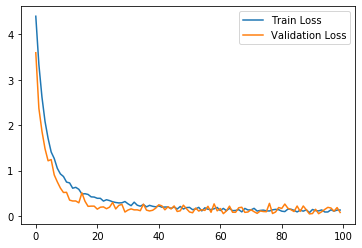

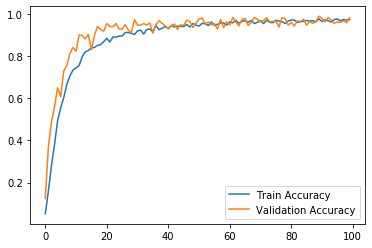

In [14]:
print(hist.history.keys())

plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["acc"], label = "Train Accuracy")
plt.plot(hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

### Save History

In [15]:
import json

with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history,f)

### Load History

In [16]:
import codecs

with codecs.open("cnn_fruit_hist.json","r",encoding="utf-8") as f:
    h = json.loads(f.read())

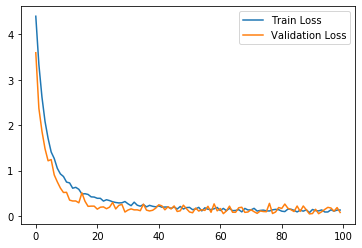

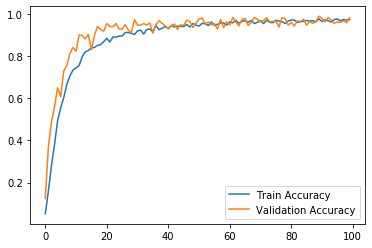

In [18]:
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

plt.plot(h["acc"], label = "Train Accuracy")
plt.plot(h["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()